# Reusing the datachallenge implementation for exploring global usecase with different constellation

## Creating novel input data configuration

### Visualizing the fields and their explanations

In [1]:
!ocb-dc_ose_2021-input_data --cfg job -p params

# @package params
sat: ???
sat_list:
- alg
- h2ag
- j2g
- j2n
- j3
- s3a
min_time: '2016-12-01'
max_time: '2018-02-01'
min_lon: -66.0
max_lon: -54.0
min_lat: 32.0
max_lat: 44.0


In [2]:
!ocb-dc_ose_2021-input_data --help

Overview:
    Download and prepare data for SSH Mapping (requires CMEMS credentials for download)
    The ssh is computed as "sla_filtered + mdt - lwe"

Basic CLI Usage:
  *  params.sat=<sat_id> to download a prepare a specific satellite

  *  --multirun: Execute the pipeline for each sat in sat_list

  *  params.(min|max)_(lon|lat|time)=<bound> to change the bound

  *  `-cd conf overrides=my_conf` to load config from conf/aprl/overrides/my_conf.yaml

Params:
    sat (str): altimeter id to download (place holder for multirun)
    sat_list (str): list of satellite to download
    min_time: start of the temporal domain
    max_time: end of the temporal domain
    min_lon: lower longitudinal bound
    max_lon: upper longitudinal bound
    min_lat: upper latitudinal bound
    max_lat: upper latitudinal bound

Parts:
	_01_dl_track -> copernicusmarine.python_interface.get.get
	_02_prepare_track -> ocb_dc_ose_2021.mods.prepare_track.prepare_track

Misc:
    Run  with "dry=True hydra.verbose=

### Writing new file

In [3]:
!mkdir -p conf/aprl/overrides

In [4]:
%%writefile conf/aprl/overrides/global.yaml
# @package params

sat_list: [j3, s3b, h2ag, c2]
min_time: 2019-05-01
max_time: 2019-05-31
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global.yaml


In [5]:
%%bash
ocb-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]'  +overrides@params=global\
     dry=True

[2024-04-10 15:37:43,802][HYDRA] Launching 4 jobs locally


[2024-04-10 15:37:43,802][HYDRA] 	#0 : params.sat=j3 +overrides@params=global dry=True


[2024-04-10 15:37:43,899][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:43,899][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:37:43,899][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:43,899][aprl.appareil][INFO] - Done


[2024-04-10 15:37:43,900][HYDRA] 	#1 : params.sat=s3b +overrides@params=global dry=True


[2024-04-10 15:37:43,998][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:43,998][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:37:43,998][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:43,998][aprl.appareil][INFO] - Done


[2024-04-10 15:37:43,999][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global dry=True


[2024-04-10 15:37:44,096][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:44,096][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:37:44,096][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:44,096][aprl.appareil][INFO] - Done


[2024-04-10 15:37:44,097][HYDRA] 	#3 : params.sat=c2 +overrides@params=global dry=True


[2024-04-10 15:37:44,194][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:44,194][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:37:44,194][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:44,194][aprl.appareil][INFO] - Done


In [6]:
%%bash
ocb-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global \
      hydra/launcher=joblib \
      hydra.launcher.n_jobs=2

[2024-04-10 15:37:45,764][HYDRA] Joblib.Parallel(n_jobs=2,backend=loky,prefer=processes,require=None,verbose=0,timeout=None,pre_dispatch=2*n_jobs,batch_size=auto,temp_folder=None,max_nbytes=None,mmap_mode=r) is launching 4 jobs


[2024-04-10 15:37:45,764][HYDRA] Launching jobs, sweep output dir : multirun/2024-04-10/15-37-45


[2024-04-10 15:37:45,764][HYDRA] 	#0 : params.sat=j3 +overrides@params=global


[2024-04-10 15:37:45,764][HYDRA] 	#1 : params.sat=s3b +overrides@params=global


[2024-04-10 15:37:45,764][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global


[2024-04-10 15:37:45,764][HYDRA] 	#3 : params.sat=c2 +overrides@params=global


[2024-04-10 15:37:46,749][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:46,749][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:37:46,749][aprl.appareil][INFO] - Starting


[2024-04-10 15:37:46,750][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-10T15:37:47Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 15:37:47,086][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T15:37:47Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 15:37:47,086][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T15:37:47Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 15:37:47,086][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T15:37:47Z - Downloading using service original-files...


[2024-04-10 15:37:47,086][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-10T15:37:47Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 15:37:47,430][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T15:37:47Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 15:37:47,430][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T15:37:47Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 15:37:47,431][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T15:37:47Z - Downloading using service original-files...


[2024-04-10 15:37:47,431][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:06<00:00,  4.68it/s]


[2024-04-10 15:37:54,700][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 15:37:54,700][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:54,700][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:06<00:00,  4.71it/s]


[2024-04-10 15:37:54,926][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 15:37:54,926][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:37:54,926][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 15:37:59,808][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 15:37:59,822][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 15:37:59,822][aprl.appareil][INFO] - Done


[2024-04-10 15:38:00,863][aprl.appareil][INFO] - Starting


[2024-04-10 15:38:00,863][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:38:01,042][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 15:38:01,059][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 15:38:01,059][aprl.appareil][INFO] - Done


INFO - 2024-04-10T15:38:01Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 15:38:01,337][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T15:38:01Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 15:38:01,337][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T15:38:01Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 15:38:01,337][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T15:38:01Z - Downloading using service original-files...


[2024-04-10 15:38:01,337][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


[2024-04-10 15:38:01,374][aprl.appareil][INFO] - Starting


[2024-04-10 15:38:01,374][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-10T15:38:01Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 15:38:01,806][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T15:38:01Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 15:38:01,807][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T15:38:01Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 15:38:01,807][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T15:38:01Z - Downloading using service original-files...


[2024-04-10 15:38:01,807][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:04<00:00,  6.71it/s]


[2024-04-10 15:38:06,679][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 15:38:06,679][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:38:06,679][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:04<00:00,  6.23it/s]


[2024-04-10 15:38:07,922][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 15:38:07,922][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:38:07,923][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 15:38:09,428][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 15:38:09,442][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 15:38:09,442][aprl.appareil][INFO] - Done


[2024-04-10 15:38:11,489][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 15:38:11,505][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 15:38:11,505][aprl.appareil][INFO] - Done


In [7]:
import xarray as xr
import pandas as pd

obs = xr.open_mfdataset('data/prepared/input/*.nc', combine='nested',concat_dim='time')

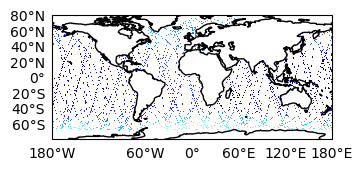

In [8]:
import hvplot.xarray
import hvplot

bin_size = 0.25
to_plot = (obs.where((obs.time>pd.to_datetime('2019-05-15')) & (obs.time<pd.to_datetime('2019-05-16')) )
.drop_vars('time').assign(
        lat=obs.lat / bin_size // 1 * bin_size,
        lon=obs.lon / bin_size // 1 * bin_size
    )[['ssh', 'lat', 'lon']].load()
    .drop_vars('time')
    .to_dataframe()
    .groupby(['lat', 'lon']).mean()
    .to_xarray()
).ssh
hvfig = to_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=700,
    height=50,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [9]:
!wget https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py

--2024-04-10 15:38:23--  https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 4242 (4,1K) [text/plain]
Saving to: ‘patcher_oi_torch.py’

patcher_oi_torch.py 100%[===================>]   4,14K  --.-KB/s    in 0s      

2024-04-10 15:38:23 (41,6 MB/s) - ‘patcher_oi_torch.py’ saved [4242/4242]



In [10]:
import numpy as np
import xarray as xr
import pandas as pd
from functools import partial
from xrpatcher import XRDAPatcher
from patcher_oi_torch import oi


outgrid = oi(
    outgrid_da=xr.DataArray(
        dims=('time', 'lat', 'lon'),
        coords=dict(
            time=pd.date_range('2019-05-15', '2019-05-15'),
            lat=np.arange(-90, 90, .25),
            lon=np.arange(-180, 180, .25),
        ),
    ),
    patcher_cls=partial(XRDAPatcher,
        patches=dict(time=1, lat=80, lon=120),
        strides=dict(time=1, lat=80, lon=120)
    ),
    obs=obs.load(),
    lt=pd.to_timedelta('7D'), lx=1., ly=1.,
    noise=0.05,
    obs_dt=pd.to_timedelta('2D'), obs_dx=.5, obs_dy=.5,
    device='cuda'
)

  0%|                                                                                                                          | 0/108 [00:00<?, ?it/s]

  1%|█                                                                                                                 | 1/108 [00:02<05:06,  2.86s/it]

  2%|██                                                                                                                | 2/108 [00:03<02:14,  1.27s/it]

  3%|███▏                                                                                                              | 3/108 [00:03<01:19,  1.32it/s]

  4%|████▏                                                                                                             | 4/108 [00:03<00:53,  1.94it/s]

  5%|█████▎                                                                                                            | 5/108 [00:03<00:39,  2.62it/s]

  6%|██████▎                                                                                                           | 6/108 [00:03<00:30,  3.30it/s]

  6%|███████▍                                                                                                          | 7/108 [00:03<00:24,  4.04it/s]

  7%|████████▍                                                                                                         | 8/108 [00:03<00:21,  4.73it/s]

  8%|█████████▌                                                                                                        | 9/108 [00:04<00:18,  5.36it/s]

  9%|██████████▍                                                                                                      | 10/108 [00:04<00:16,  5.88it/s]

 10%|███████████▌                                                                                                     | 11/108 [00:04<00:15,  6.30it/s]

 11%|████████████▌                                                                                                    | 12/108 [00:04<00:14,  6.62it/s]

 12%|█████████████▌                                                                                                   | 13/108 [00:05<00:37,  2.55it/s]

 13%|██████████████▋                                                                                                  | 14/108 [00:06<01:06,  1.40it/s]

 14%|███████████████▋                                                                                                 | 15/108 [00:08<01:25,  1.08it/s]

 15%|████████████████▋                                                                                                | 16/108 [00:09<01:27,  1.05it/s]

 16%|█████████████████▊                                                                                               | 17/108 [00:09<01:18,  1.16it/s]

 17%|██████████████████▊                                                                                              | 18/108 [00:11<01:32,  1.03s/it]

 18%|███████████████████▉                                                                                             | 19/108 [00:12<01:29,  1.01s/it]

 19%|████████████████████▉                                                                                            | 20/108 [00:13<01:28,  1.01s/it]

 19%|█████████████████████▉                                                                                           | 21/108 [00:13<01:19,  1.09it/s]

 20%|███████████████████████                                                                                          | 22/108 [00:14<01:13,  1.18it/s]

 21%|████████████████████████                                                                                         | 23/108 [00:15<01:11,  1.19it/s]

 22%|█████████████████████████                                                                                        | 24/108 [00:16<01:11,  1.17it/s]

 23%|██████████████████████████▏                                                                                      | 25/108 [00:17<01:12,  1.14it/s]

 24%|███████████████████████████▏                                                                                     | 26/108 [00:18<01:15,  1.08it/s]

 25%|████████████████████████████▎                                                                                    | 27/108 [00:19<01:17,  1.04it/s]

 26%|█████████████████████████████▎                                                                                   | 28/108 [00:19<01:06,  1.21it/s]

 27%|██████████████████████████████▎                                                                                  | 29/108 [00:20<01:06,  1.20it/s]

 28%|███████████████████████████████▍                                                                                 | 30/108 [00:21<01:10,  1.10it/s]

 29%|████████████████████████████████▍                                                                                | 31/108 [00:22<01:10,  1.10it/s]

 30%|█████████████████████████████████▍                                                                               | 32/108 [00:23<01:12,  1.05it/s]

 31%|██████████████████████████████████▌                                                                              | 33/108 [00:24<01:13,  1.02it/s]

 31%|███████████████████████████████████▌                                                                             | 34/108 [00:25<01:11,  1.04it/s]

 32%|████████████████████████████████████▌                                                                            | 35/108 [00:26<01:02,  1.17it/s]

 33%|█████████████████████████████████████▋                                                                           | 36/108 [00:27<01:00,  1.20it/s]

 34%|██████████████████████████████████████▋                                                                          | 37/108 [00:27<00:58,  1.21it/s]

 35%|███████████████████████████████████████▊                                                                         | 38/108 [00:28<00:58,  1.19it/s]

 36%|████████████████████████████████████████▊                                                                        | 39/108 [00:29<00:58,  1.17it/s]

 37%|█████████████████████████████████████████▊                                                                       | 40/108 [00:30<00:47,  1.42it/s]

 38%|██████████████████████████████████████████▉                                                                      | 41/108 [00:30<00:38,  1.74it/s]

 39%|███████████████████████████████████████████▉                                                                     | 42/108 [00:31<00:44,  1.50it/s]

 40%|████████████████████████████████████████████▉                                                                    | 43/108 [00:31<00:36,  1.77it/s]

 41%|██████████████████████████████████████████████                                                                   | 44/108 [00:32<00:34,  1.86it/s]

 42%|███████████████████████████████████████████████                                                                  | 45/108 [00:32<00:40,  1.56it/s]

 43%|████████████████████████████████████████████████▏                                                                | 46/108 [00:33<00:40,  1.52it/s]

 44%|█████████████████████████████████████████████████▏                                                               | 47/108 [00:33<00:32,  1.89it/s]

 44%|██████████████████████████████████████████████████▏                                                              | 48/108 [00:34<00:34,  1.72it/s]

 45%|███████████████████████████████████████████████████▎                                                             | 49/108 [00:35<00:38,  1.55it/s]

 46%|████████████████████████████████████████████████████▎                                                            | 50/108 [00:36<00:41,  1.39it/s]

 47%|█████████████████████████████████████████████████████▎                                                           | 51/108 [00:37<00:43,  1.32it/s]

 48%|██████████████████████████████████████████████████████▍                                                          | 52/108 [00:37<00:34,  1.64it/s]

 49%|███████████████████████████████████████████████████████▍                                                         | 53/108 [00:37<00:29,  1.88it/s]

 50%|████████████████████████████████████████████████████████▌                                                        | 54/108 [00:38<00:31,  1.72it/s]

 51%|█████████████████████████████████████████████████████████▌                                                       | 55/108 [00:38<00:25,  2.12it/s]

 52%|██████████████████████████████████████████████████████████▌                                                      | 56/108 [00:38<00:22,  2.34it/s]

 53%|███████████████████████████████████████████████████████████▋                                                     | 57/108 [00:39<00:27,  1.86it/s]

 54%|████████████████████████████████████████████████████████████▋                                                    | 58/108 [00:40<00:27,  1.83it/s]

 55%|█████████████████████████████████████████████████████████████▋                                                   | 59/108 [00:40<00:27,  1.78it/s]

 56%|██████████████████████████████████████████████████████████████▊                                                  | 60/108 [00:41<00:29,  1.61it/s]

 56%|███████████████████████████████████████████████████████████████▊                                                 | 61/108 [00:42<00:31,  1.49it/s]

 57%|████████████████████████████████████████████████████████████████▊                                                | 62/108 [00:43<00:33,  1.37it/s]

 58%|█████████████████████████████████████████████████████████████████▉                                               | 63/108 [00:43<00:29,  1.53it/s]

 59%|██████████████████████████████████████████████████████████████████▉                                              | 64/108 [00:44<00:28,  1.57it/s]

 60%|████████████████████████████████████████████████████████████████████                                             | 65/108 [00:45<00:29,  1.44it/s]

 61%|█████████████████████████████████████████████████████████████████████                                            | 66/108 [00:45<00:24,  1.71it/s]

 62%|██████████████████████████████████████████████████████████████████████                                           | 67/108 [00:45<00:18,  2.20it/s]

 63%|███████████████████████████████████████████████████████████████████████▏                                         | 68/108 [00:45<00:15,  2.62it/s]

 64%|████████████████████████████████████████████████████████████████████████▏                                        | 69/108 [00:46<00:14,  2.78it/s]

 65%|█████████████████████████████████████████████████████████████████████████▏                                       | 70/108 [00:46<00:12,  3.00it/s]

 66%|██████████████████████████████████████████████████████████████████████████▎                                      | 71/108 [00:47<00:16,  2.22it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 72/108 [00:47<00:20,  1.80it/s]

 68%|████████████████████████████████████████████████████████████████████████████▍                                    | 73/108 [00:48<00:23,  1.50it/s]

 69%|█████████████████████████████████████████████████████████████████████████████▍                                   | 74/108 [00:49<00:24,  1.39it/s]

 69%|██████████████████████████████████████████████████████████████████████████████▍                                  | 75/108 [00:49<00:18,  1.81it/s]

 70%|███████████████████████████████████████████████████████████████████████████████▌                                 | 76/108 [00:50<00:15,  2.11it/s]

 71%|████████████████████████████████████████████████████████████████████████████████▌                                | 77/108 [00:51<00:18,  1.64it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████▌                               | 78/108 [00:51<00:19,  1.57it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████▋                              | 79/108 [00:52<00:14,  1.94it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████▋                             | 80/108 [00:52<00:11,  2.43it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████▊                            | 81/108 [00:52<00:08,  3.05it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████▊                           | 82/108 [00:52<00:07,  3.65it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████▊                          | 83/108 [00:52<00:07,  3.22it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████▉                         | 84/108 [00:53<00:11,  2.02it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████▉                        | 85/108 [00:54<00:11,  1.97it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████▉                       | 86/108 [00:54<00:09,  2.31it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████                      | 87/108 [00:54<00:07,  2.88it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████                     | 88/108 [00:54<00:05,  3.46it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████                    | 89/108 [00:55<00:07,  2.51it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                  | 90/108 [00:56<00:12,  1.47it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████▏                 | 91/108 [00:57<00:09,  1.71it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▎                | 92/108 [00:57<00:07,  2.16it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▎               | 93/108 [00:57<00:05,  2.72it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▎              | 94/108 [00:57<00:04,  3.37it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▍             | 95/108 [00:57<00:03,  3.82it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 96/108 [00:58<00:03,  3.41it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 97/108 [00:58<00:02,  4.00it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 98/108 [00:58<00:02,  4.56it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 99/108 [00:58<00:01,  5.06it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 100/108 [00:58<00:01,  5.46it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 101/108 [00:59<00:01,  5.79it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 102/108 [00:59<00:01,  5.48it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 103/108 [00:59<00:01,  4.44it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 104/108 [00:59<00:00,  4.29it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 105/108 [00:59<00:00,  4.81it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 106/108 [01:00<00:00,  5.23it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 107/108 [01:00<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108/108 [01:00<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108/108 [01:00<00:00,  1.79it/s]

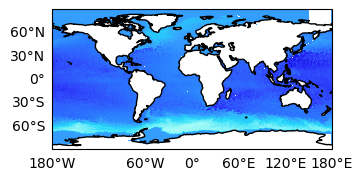

In [11]:
from global_land_mask import globe
lat = outgrid.lat.values
lon = outgrid.lon.values
lon_grid, lat_grid = np.meshgrid(lon,lat)
globe_ocean_mask = globe.is_ocean(lat_grid, lon_grid)
out_plot = (
    outgrid.sel(time='2019-05-15').where(globe_ocean_mask)
    .pipe(lambda ds: ds.where(ds <3))
    .pipe(lambda ds: ds.where(ds >-3))
)
hvfig = out_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=700,
    height=50,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

/raid/localscratch/qfebvre/ocb/ocb-docs/lib/python3.11/site-packages/pint/facets/plain/quantity.py:998: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


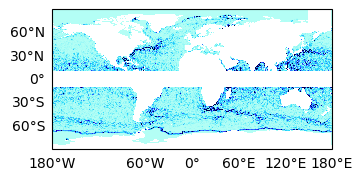

In [12]:
import ocn_tools._src.geoprocessing.geostrophic as geo
import ocn_tools._src.geoprocessing.validation as val
hvfig = (
    out_plot
    .where(np.abs(out_plot.lat)>10)
    .to_dataset(name='ssh')
    .pipe(val.validate_latlon)
    .pipe(geo.geostrophic_velocities)
    .pipe(geo.kinetic_energy)
).ke.hvplot(
    kind='quadmesh',
    geo=True,
    width=700,
    height=50,
    cmap='viridis',
    clim=(0, 0.3)
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [13]:
!ocb-dc_ose_2021-metrics --cfg job -p params

# @package params
method: default
study_path: data/downloads/method_outputs/${.method}.nc
study_var: ssh
sat: c2
min_time: '2017-01-01'
max_time: '2017-12-31'
min_lon: -65.0
max_lon: -55.0
min_lat: 33.0
max_lat: 43.0


In [14]:
%%writefile conf/aprl/overrides/global_eval.yaml
# @package params

study_path: output.nc
study_var: ssh
sat: alg
min_time: '2019-05-15'
max_time: '2019-05-16'
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global_eval.yaml


In [15]:
%%bash
ocb-dc_ose_2021-metrics -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global_eval \
      dry=True

[2024-04-10 15:39:41,361][HYDRA] Launching 1 jobs locally


[2024-04-10 15:39:41,361][HYDRA] 	#0 : +overrides@params=global_eval dry=True


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Starting


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 15:39:41,476][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 15:39:41,477][aprl.appareil][INFO] - Done


In [16]:
dt, t = pd.to_timedelta("1D"), pd.to_datetime('2019-05-15')
out_grid = outgrid.pipe(val.validate_latlon).pad(time=1, mode='edge').assign_coords(
    time=pd.date_range(t-dt, t+dt, freq=dt)
).to_dataset(name='ssh')
out_grid.to_netcdf('output.nc')

In [17]:
%%bash
ocb-dc_ose_2021-metrics \
  'hydra.searchpath=[file://conf]' \
    +overrides@params=global_eval dry=True

[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Starting


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 15:39:44,289][aprl.appareil][INFO] - Done


In [18]:
%%bash
ocb-dc_ose_2021-metrics\
    'hydra.searchpath=[file://conf]' \
     +overrides@params=global_eval

[2024-04-10 15:39:46,878][aprl.appareil][INFO] - Starting


[2024-04-10 15:39:46,878][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-10T15:39:47Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 15:39:47,403][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T15:39:47Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 15:39:47,403][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T15:39:47Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 15:39:47,403][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T15:39:47Z - Downloading using service original-files...


[2024-04-10 15:39:47,403][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:07<00:00,  4.43it/s]


[2024-04-10 15:39:55,469][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 15:39:55,470][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 15:39:55,470][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 15:39:57,584][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 15:39:57,596][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 15:39:57,596][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 15:39:57,596][ocb_dc_ose_2021.mods.interp_on_track][INFO] - Starting


[2024-04-10 15:39:57,654][ocb_dc_ose_2021.mods.interp_on_track][INFO] - Done


[2024-04-10 15:39:57,655][aprl.appareil][INFO] - part _03_interp_on_track done


[2024-04-10 15:39:57,655][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 15:39:57,655][ocb_dc_ose_2021.mods.lambdax][INFO] - Starting


[2024-04-10 15:39:57,763][ocb_dc_ose_2021.mods.lambdax][INFO] - Effective scale resolved (interpolated at score 0.5) 181.95


[2024-04-10 15:39:57,772][ocb_dc_ose_2021.mods.lambdax][INFO] - Done


[2024-04-10 15:39:57,773][aprl.appareil][INFO] - part _04_1_lambdax done


[2024-04-10 15:39:57,773][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 15:39:57,773][ocb_dc_ose_2021.mods.mu][INFO] - Starting


[2024-04-10 15:39:57,809][ocb_dc_ose_2021.mods.mu][INFO] - Mu score: 0.9254379997056986


[2024-04-10 15:39:57,809][ocb_dc_ose_2021.mods.mu][INFO] - Done


[2024-04-10 15:39:57,809][aprl.appareil][INFO] - part _04_2_mu done


[2024-04-10 15:39:57,809][aprl.appareil][INFO] - Done


In [19]:
import pandas as pd
import glob
print(pd.concat([pd.read_json(p, typ='series') for p in glob.glob('data/metrics/*.json')]).to_markdown())

|             |          0 |
|:------------|-----------:|
| $\lambda_x$ | 181.949    |
| $\mu$       |   0.925438 |
